# Faster R-CNN

The goal of this notebook is to run a Faster R-CNN model on R-CNN images and save the state
Then, use it to make real-world predictions


In [1]:
import os.path

import cv2
import numpy as np
import requests
import torchvision
import torchvision.transforms as transforms

In [2]:
# let's load the faster R-CNN model from pytorch model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# set the model in evaluation mode

model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
        )
  

In [3]:
# read the file:
image_file = 'C:/Users/Billi/repos/Computer_Vision/OpenCV/bdd100k/seg/images/train/00e9be89-00001315.jpg'

In [10]:
classes = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack',
    'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk',
    'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brushes']

In [13]:
img = cv2.imread(image_file)

In [17]:
# transform the loaded image

transform = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor()])
nn_input = transform(img)
output = model([nn_input])

In [18]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [24]:
# iterate over the network output for all boxes

for box, box_class, score in zip(output[0]['boxes'].detach().numpy(),
                                 output[0]['labels'].detach().numpy(),
                                 output[0]['scores'].detach().numpy()):
    
    # filter the boxes by score
    if score > 0.5:
        # transform bounding box format
        box = [(box[0], box[1]), (box[2], box[3])]
        
        # select class color
        color = colors[box_class]
        
        # extract class name
        class_name = classes[box_class]
        
        # draw the bounding box
        cv2.rectangle(img=img,
                      pt1=box[0],
                      pt2=box[1],
                      color=color,
                      thickness=2)
        
        # display the box class label
        cv2.putText(img=img,
                    text=class_name,
                    org=box[0],
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=1,
                    color=color,
                    thickness=2)
        

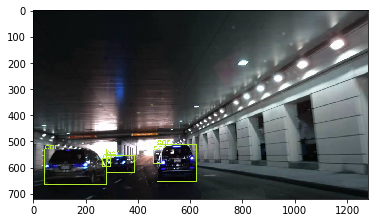

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [2]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined